EDA on CAL FIRE data

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv")
#cal_fire_data = cal_fire_data.dropna(subset=['Year Built (parcel)'])
#cal_fire_data = cal_fire_data[cal_fire_data['Year Built (parcel)'] > 1000]
cal_fire_data['Age'] = 2025 - cal_fire_data['Year Built (parcel)']
cal_fire_data

/var/folders/9q/j8l32t2n55q9zyxmpqzbqwlh0000gn/T/ipykernel_93595/4003442465.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  cal_fire_data = pd.read_csv("Housing_Data_Cleaned_03052025.csv")


,Unnamed: 0,* Damage,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,* CAL FIRE Unit,County,Community,* Incident Name,Incident Start Date,...,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Fire Name (Secondary),Assessed Improved Value (parcel),Year Built (parcel),Latitude,Longitude,Damage_Level,Incident Month/Year,Age
0,0,No Damage,Road,NaN,Winters,LNU,Solano,NaN,Quail,06/06/2020,...,NaN,NaN,Quail,510000.0,1997.0,38.474960,-122.044465,0,06/2020,28.0
1,1,Affected (1-9%),Road,NaN,Winters,LNU,Solano,NaN,Quail,06/06/2020,...,NaN,NaN,Quail,573052.0,1980.0,38.477442,-122.043252,1,06/2020,45.0
2,2,No Damage,Road,NaN,Winters,LNU,Solano,NaN,Quail,06/06/2020,...,NaN,NaN,Quail,350151.0,2004.0,38.479358,-122.044585,0,06/2020,21.0
3,3,No Damage,Road,NaN,Winters,LNU,Solano,NaN,Quail,06/06/2020,...,NaN,NaN,Quail,134880.0,1981.0,38.487313,-122.015115,0,06/2020,44.0
4,4,No Damage,Road,NaN,Winters,LNU,Solano,NaN,Quail,06/06/2020,...,NaN,NaN,Quail,346648.0,1980.0,38.485636,-122.016122,0,06/2020,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130239,130717,Destroyed (>50%),Boulevard,Blding A,Pacific Palisades,LAC,Los Angeles,NaN,Palisades,01/07/2025,...,NaN,<30',NaN,143091.0,1952.0,34.051455,-118.524687,4,01/2025,73.0
130240,130718,Destroyed (>50%),Boulevard,Blding B,Pacific Palisades,LAC,Los Angeles,NaN,Palisades,01/07/2025,...,NaN,NaN,NaN,143091.0,1952.0,34.051482,-118.524543,4,01/2025,73.0
130241,130719,Destroyed (>50%),Street,Blding A,Pacific Palisades,LAC,Los Angeles,NaN,Palisades,01/07/2025,...,NaN,NaN,NaN,647421.0,1946.0,34.038110,-118.527477,4,01/2025,79.0
130242,130720,Destroyed (>50%),Street,Blding B,Pacific Palisades,LAC,Los Angeles,NaN,Palisades,01/07/2025,...,NaN,NaN,NaN,647421.0,1946.0,34.038254,-118.527454,4,01/2025,79.0


In [22]:
cal_fire_data.info()
cal_fire_data['* Incident Name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130244 entries, 0 to 130243
Data columns (total 37 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Unnamed: 0                                                    130244 non-null  int64  
 1   * Damage                                                      130244 non-null  object 
 2   * Street Type (e.g. road, drive, lane, etc.)                  115846 non-null  object 
 3   Street Suffix (e.g. apt. 23, blding C)                        61930 non-null   object 
 4   * City                                                        98737 non-null   object 
 5   * CAL FIRE Unit                                               130244 non-null  object 
 6   County                                                        130214 non-null  object 
 7   Community                                               

* Incident Name
Camp                   23624
Eaton                  18382
Palisades              12070
Tubbs                   6023
LNU Lightning Cmplx     5110
                       ...  
Carder                     1
Richmond                   1
Waverly                    1
Argyle                     1
Homestead                  1
Name: count, Length: 272, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
fire_train, fire_test = train_test_split(cal_fire_data, test_size=0.2, shuffle=True, random_state=216)

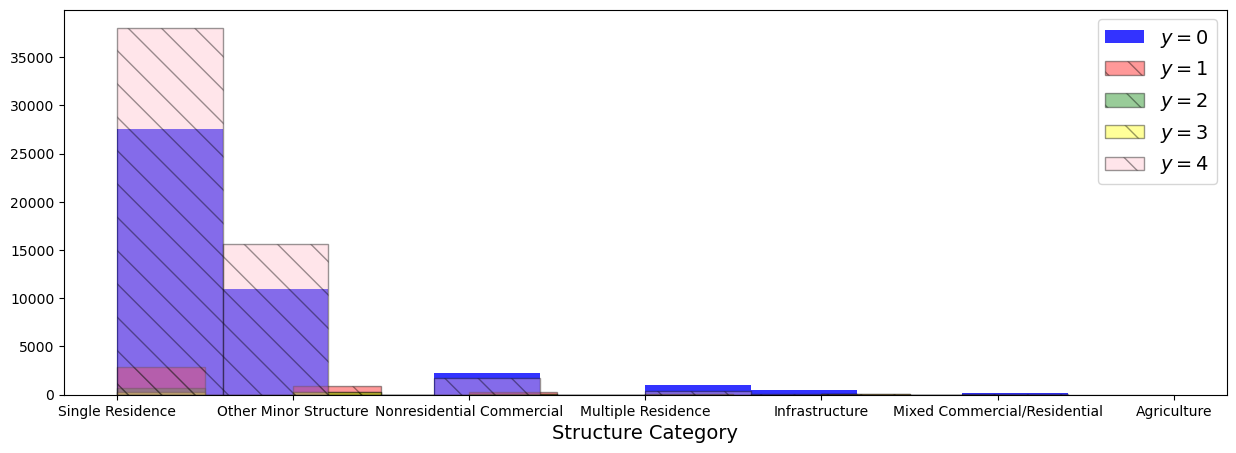

In [24]:
plt.figure(figsize=(15,5))


plt.hist(fire_train.loc[fire_train.Damage_Level==0]['Structure Category'].values,
            color='blue',
            alpha=.8,
            label="$y=0$")

plt.hist(fire_train.loc[fire_train.Damage_Level==1]['Structure Category'].values,
            color='red',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=1$")
plt.hist(fire_train.loc[fire_train.Damage_Level==2]['Structure Category'].values,
            color='green',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=2$")
plt.hist(fire_train.loc[fire_train.Damage_Level==3]['Structure Category'].values,
            color='yellow',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=3$")
plt.hist(fire_train.loc[fire_train.Damage_Level==4]['Structure Category'].values,
            color='pink',
            alpha=.4,
            hatch = '\\',
            edgecolor='black',
            label="$y=4$")

plt.xlabel("Structure Category", fontsize=14)
plt.legend(fontsize=14)

plt.show()

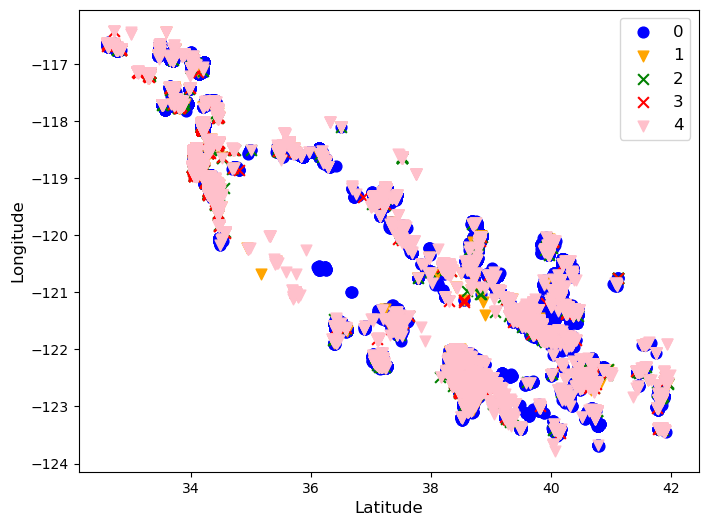

In [25]:
plt.figure(figsize=(8,6))

plt.scatter(fire_train.loc[fire_train.Damage_Level==0].Latitude,
            fire_train.loc[fire_train.Damage_Level==0].Longitude,
            c='blue',
            s=60,
            label="0")

plt.scatter(fire_train.loc[fire_train.Damage_Level==1].Latitude,
            fire_train.loc[fire_train.Damage_Level==1].Longitude,
            c='orange',
            s=60,
            marker='v',
            label="1")

plt.scatter(fire_train.loc[fire_train.Damage_Level==2].Latitude,
            fire_train.loc[fire_train.Damage_Level==2].Longitude,
            c='green',
            s=60,
            marker='x',
            label="2")

plt.scatter(fire_train.loc[fire_train.Damage_Level==3].Latitude,
            fire_train.loc[fire_train.Damage_Level==3].Longitude,
            c='red',
            s=60,
            marker='x',
            label="3")

plt.scatter(fire_train.loc[fire_train.Damage_Level==4].Latitude,
            fire_train.loc[fire_train.Damage_Level==4].Longitude,
            c='pink',
            s=60,
            marker='v',
            label="4")

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.legend(fontsize=12)

plt.show()